In [1]:
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report,f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from scipy import spatial
import keras
from keras_preprocessing.sequence import pad_sequences
#!pip install pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Bidirectional,Conv1D, MaxPooling1D, Dropout, Activation
from tensorflow.keras.layers import Embedding
import re
import string
import json
import random
import tensorflow as tf

# Part A

• **DOMAIN**: Digital content management

• **CONTEXT**: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

• **DATA DESCRIPTION**: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),
• 8086 "20s" blogs(ages 23-27) and
• 2994 "30s" blogs (ages 33-47)
• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link.

• **PROJECT OBJECTIVE**: To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.

**Steps and tasks**:

#### 1. Read and Analyse Dataset.

##### A. Clearly write outcome of data analysis(Minimum 2 points)

In [2]:
with zipfile.ZipFile("D:/Nikhila/PGP - AIML/2. Projects/9. Natural Language Processing/Project 1/blogs.zip","r") as zip_ref:
    zip_ref.extractall("D:/Nikhila/PGP - AIML/2. Projects/9. Natural Language Processing/Project 1")

In [3]:
# Reading the data 
df = pd.read_csv("D:/Nikhila/PGP - AIML/2. Projects/9. Natural Language Processing/Project 1/blogtext.csv")
df.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [4]:
df.shape

(681284, 7)

In [5]:
df['text'][0]

'           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '

In [6]:
print('Unique values in the column gender are',df['gender'].nunique(),'\n')
print('Unique values in the column age are',df['age'].nunique(),'\n')
print('Unique values in the column topic are',df['topic'].nunique(),'\n')
print('Unique values in the column sign are',df['sign'].nunique())

Unique values in the column gender are 2 

Unique values in the column age are 26 

Unique values in the column topic are 40 

Unique values in the column sign are 12


In [7]:
print(df.topic.unique())

['Student' 'InvestmentBanking' 'indUnk' 'Non-Profit' 'Banking' 'Education'
 'Engineering' 'Science' 'Communications-Media' 'BusinessServices'
 'Sports-Recreation' 'Arts' 'Internet' 'Museums-Libraries' 'Accounting'
 'Technology' 'Law' 'Consulting' 'Automotive' 'Religion' 'Fashion'
 'Publishing' 'Marketing' 'LawEnforcement-Security' 'HumanResources'
 'Telecommunications' 'Military' 'Government' 'Transportation'
 'Architecture' 'Advertising' 'Agriculture' 'Biotech' 'RealEstate'
 'Manufacturing' 'Construction' 'Chemicals' 'Maritime' 'Tourism'
 'Environment']


In [8]:
df.topic.value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

**Observation** - We have 681284 records with 40 different topics. The dataframe also has information about gender, age, sign and date.

In [9]:
# dropping duplicates and resetting index

df.drop_duplicates(subset="text",inplace=True)
df.reset_index(inplace = True,drop=True)

print('The shape of the dataframe is',df.shape)

The shape of the dataframe is (611652, 7)


In [10]:
# dropping unnecessary columns

df.drop(['id','date'], axis=1, inplace=True)

#### EDA

<AxesSubplot:xlabel='gender', ylabel='count'>

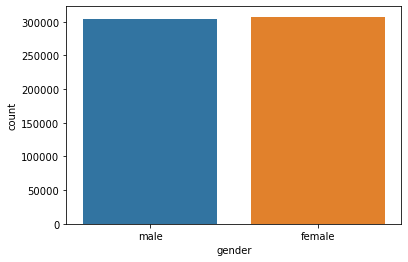

In [11]:
sns.countplot(x='gender',data=df)

**Observation**: We have approximately same number of records for male and female.

<AxesSubplot:xlabel='age', ylabel='count'>

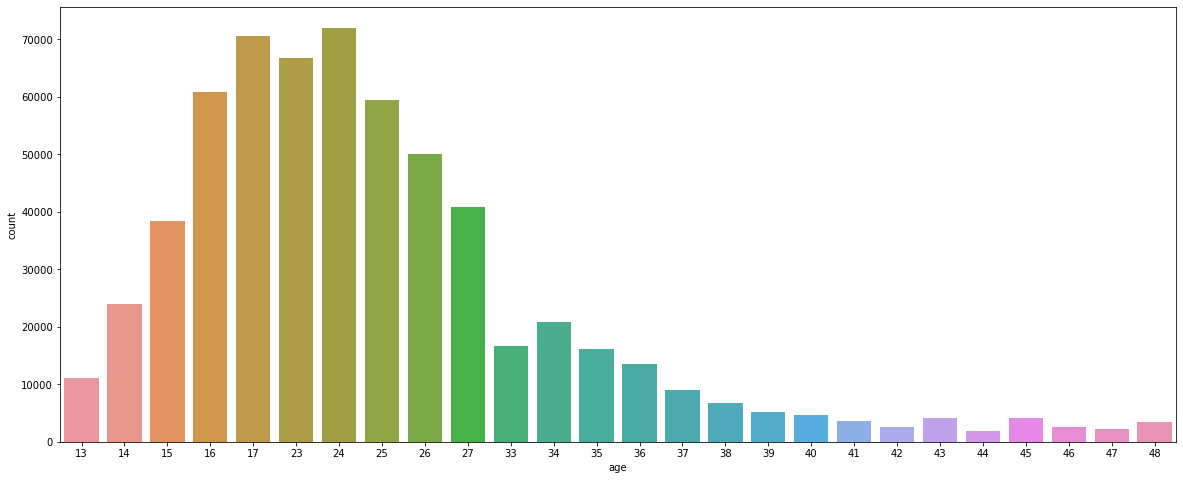

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='age',data=df)

**Observation**:Lot of the data falls under age group of 10's and 20's.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'InvestmentBanking'),
  Text(2, 0, 'indUnk'),
  Text(3, 0, 'Non-Profit'),
  Text(4, 0, 'Banking'),
  Text(5, 0, 'Education'),
  Text(6, 0, 'Engineering'),
  Text(7, 0, 'Science'),
  Text(8, 0, 'Communications-Media'),
  Text(9, 0, 'BusinessServices'),
  Text(10, 0, 'Sports-Recreation'),
  Text(11, 0, 'Arts'),
  Text(12, 0, 'Internet'),
  Text(13, 0, 'Museums-Libraries'),
  Text(14, 0, 'Accounting'),
  Text(15, 0, 'Technology'),
  Text(16, 0, 'Law'),
  Text(17, 0, 'Consulting'),
  Text(18, 0, 'Automotive'),
  Text(19, 0, 'Religion'),
  Text(20, 0, 'Fashion'),
  Text(21, 0, 'Publishing'),
  Text(22, 0, 'Marketing'),
  Text(23, 0, 'LawEnforcement-Security'),
  Text(24, 0, 'HumanResources'),
  Text(25, 0, 'Telecommunications'),
  Text(26, 0, 'Military'),
  Text(27, 0, '

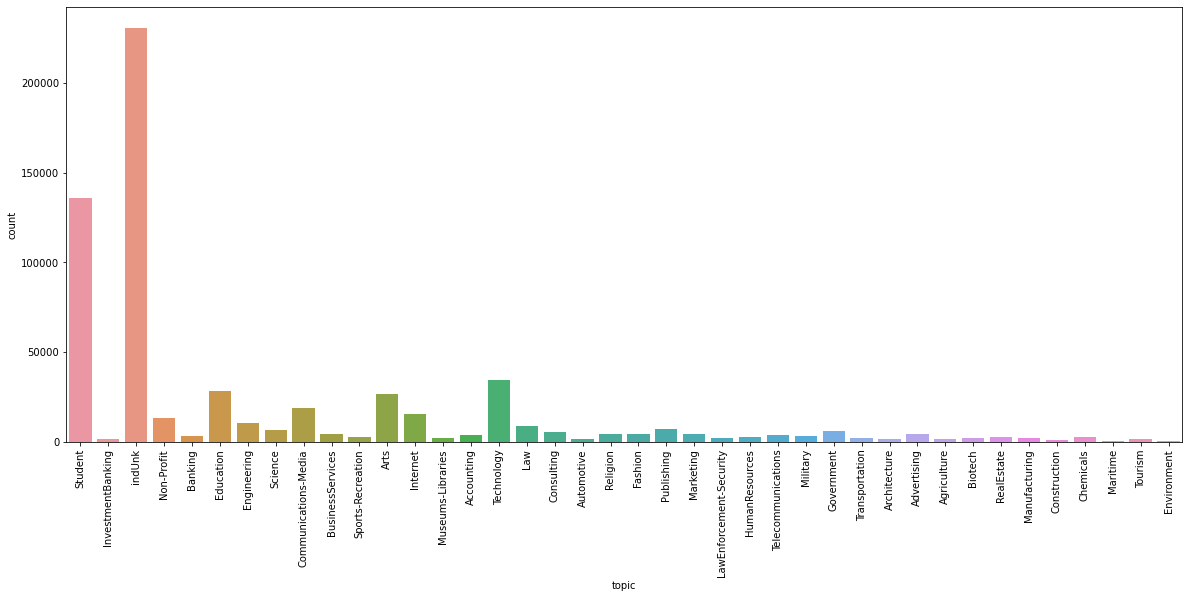

In [13]:
# sns.set(rc={'figure.figsize':(15,8.27)})
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='topic',data=df)
plt.xticks(rotation=90)

**Observation**: here, *indUnk* means unknown topic. Lot of the blogs are about Student.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Leo'),
  Text(1, 0, 'Aquarius'),
  Text(2, 0, 'Aries'),
  Text(3, 0, 'Capricorn'),
  Text(4, 0, 'Gemini'),
  Text(5, 0, 'Cancer'),
  Text(6, 0, 'Sagittarius'),
  Text(7, 0, 'Scorpio'),
  Text(8, 0, 'Libra'),
  Text(9, 0, 'Virgo'),
  Text(10, 0, 'Taurus'),
  Text(11, 0, 'Pisces')])

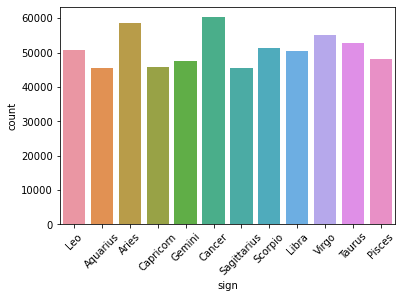

In [14]:
sns.countplot(x='sign',data=df)
plt.xticks(rotation=45)

#### Data Pre-Processing

In [15]:
# replacing indUnk with Unknown_industry in the topic column

df['topic'].replace('indUnk','Unknown_industry', inplace= True)

In [16]:
#Stratified sampling functions
def stratified_sample(df, strata, size=None, seed=None, keep_index= True):
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)
    
    # controlling variable to create the dataframe or append to it
    first = True 
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"
            
            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)
                
            # final dataframe
        if first:
            stratified_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_df = pd.concat([stratified_df,tmp_df], ignore_index=True)
    
    return stratified_df

def stratified_sample_report(df, strata, size=None):
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)
    return tmp_grpd


def __smpl_size(population, size):
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

In [17]:
stratified_sample_report(df, ['sign', 'gender','topic', 'age'], 10000)

,sign,gender,topic,age,size,samp_size
0,Aquarius,female,Accounting,16,23,0
1,Aquarius,female,Accounting,23,8,0
2,Aquarius,female,Accounting,24,299,5
3,Aquarius,female,Accounting,25,3,0
4,Aquarius,female,Accounting,26,20,0
...,...,...,...,...,...,...
5161,Virgo,male,Unknown_industry,42,45,1
5162,Virgo,male,Unknown_industry,43,25,0
5163,Virgo,male,Unknown_industry,44,6,0
5164,Virgo,male,Unknown_industry,46,49,1


**Observation**: Stratifiying the sample data based on "Gender", "Sign", "Topic" and "age" to maintain the distribution of the population dataset. 

**NOTE**- Using the limited sample of the dataset due to huge size and memory error.

In [18]:
corpus_df = stratified_sample(df, ['sign', 'gender', 'topic', 'age'], size=10000, seed=123, keep_index= True)

In [19]:
corpus_df.head().append(corpus_df.tail())

C:\Users\Nikhila KG\AppData\Local\Temp\ipykernel_14000\310110044.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus_df.head().append(corpus_df.tail())


,index,gender,age,topic,sign,text
0,553235,female,24,Accounting,Aquarius,Friday for all and all for a Friday.. ...
1,553147,female,24,Accounting,Aquarius,I actually have started about three blo...
2,553197,female,24,Accounting,Aquarius,The holidays are just about over and i ...
3,553310,female,24,Accounting,Aquarius,What to say what a day... Its just been...
4,553325,female,24,Accounting,Aquarius,urlLink STILL DREAMING&nbsp; urlLin...
9602,434698,male,41,Unknown_industry,Virgo,A Fag Grows In Brooklyn It's of...
9603,434718,male,41,Unknown_industry,Virgo,urlLink My Favorite Seer says: ...
9604,434595,male,41,Unknown_industry,Virgo,Ghost In The Machine God. I sh...
9605,181229,male,42,Unknown_industry,Virgo,urlLink This is my bestest friend i...
9606,81932,male,46,Unknown_industry,Virgo,urlLink Street view 2003&nbsp; urlLink


#### We will check if Stratified data has maintained the topic distribution from the population data.

C:\Users\Nikhila KG\AppData\Local\Temp\ipykernel_14000\2206519354.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


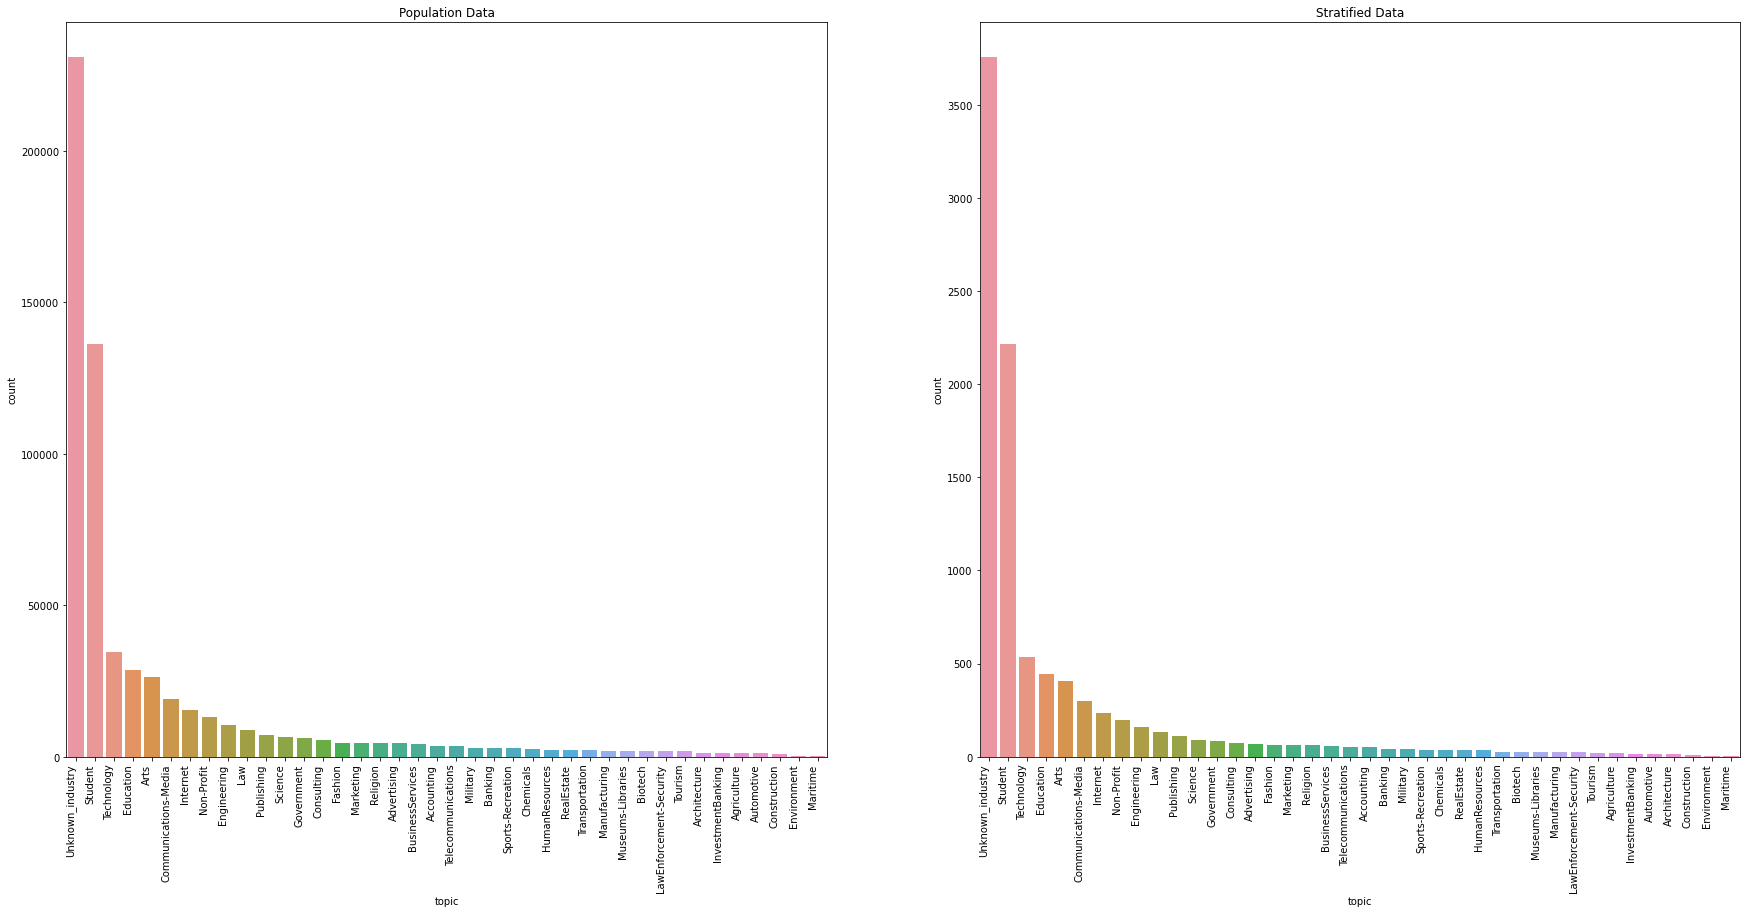

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(30, 15))
fig.autofmt_xdate(rotation=90)

sns.countplot(x='topic', data=df, order = df['topic'].value_counts().index, ax=ax[0])
ax[0].set_title("Population Data")

sns.countplot(x='topic', data=corpus_df,order = corpus_df['topic'].value_counts().index, ax=ax[1])
ax[1].set_title("Stratified Data")

fig.show()

###### B. Clean the Structured Data

###### i. Missing value analysis and imputation.

In [21]:
corpus_df.isna().sum()

index     0
gender    0
age       0
topic     0
sign      0
text      0
dtype: int64

**Observation** - We dont have any missing values

###### ii. Eliminate Non-English textual data.

In [22]:
print("Before eliminating Non-English textual data")
print(corpus_df.shape)

Before eliminating Non-English textual data
(9607, 6)


In [23]:
#!pip install langdetect

In [24]:
from langdetect import detect

def detect_english(text):
 try:
    return detect(text) == 'en'
 except:
    return False

In [25]:
corpus_df = corpus_df[corpus_df['text'].apply(detect_english)]

In [26]:
print("After eliminating Non-English textual data")
print(corpus_df.shape)

After eliminating Non-English textual data
(9235, 6)


**NOTE**: We have reduced the number of records

**Before Pre-Process steps, let us remove other columns from the dataframe**

In [27]:
corpus_df.drop(labels=['index','gender','age','sign'], axis=1,inplace=True)

#### 2. Preprocess unstructured data to make it consumable for model training.

##### A. Eliminate All special Characters and Numbers
##### B. Lowercase all textual data
##### C. Remove all Stopwords
##### D. Remove all extra white spaces

In [28]:
# remove all the places where the string urllink comes
corpus_df['text_new']=corpus_df['text'].apply(lambda x: re.sub(r'urlLink|urllink','',x)) 

# remove all the places where any url comes that starts with http or https
corpus_df['text_new']=corpus_df['text'].apply(lambda x: re.sub(r'https?\S+','',x))

In [29]:
#Eliminate All special Characters and Numbers
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

#Lowercase all textual data
def lower_case(text):
    return text.lower()    

#Eliminate All special Characters and Numbers
def remove_tags(text):    
    return re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

#Eliminate All special Characters and Numbers
def remove_special_chars_and_digits(text):
    return re.sub("(\\d|\\W)+"," ", text)

#def remove_stop_words(tokenized_text):
#    return [w for w in tokenized_text if not w in set(stopwords.words('english'))]

#Remove all Stopwords and lemmatize
def stopword_lemma(text):
    token = nltk.word_tokenize(text)
    text_stop = [x for x in token if x not in set(stopwords.words('english'))]
    lemmatizer = WordNetLemmatizer()
    text_lemma = [lemmatizer.lemmatize(word) for word in text_stop]
    text_lemma = ' '.join(text_lemma)
    return text_lemma



def normalize_text(text: str) -> str:
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_tags(text)
    text = remove_special_chars_and_digits(text)
    text = stopword_lemma(text)
    
    return text

In [30]:
corpus_df['text_new'] = corpus_df['text_new'].apply(normalize_text)

In [31]:
#Example
print(corpus_df['text'][3])
print()
print(corpus_df['text_new'][3])

       What to say what a day... Its just been one of those, yup you know the ones. Work tonight was fast and pissy. My housewarming party is this weekend, yeah for me and people who will now have a reason to drink.  Talked to Ben today, oh yeah the English guy. Whoa, his accent was strong, but quite nice i must admit. I wish it didnt cost an arm and a leg to talk to him, or i would more, most def. He seems intresting and i would love to see some of the buildings in his town, or london. Paris is another place, ah yes, in dream mode.  Not that i didnt know it already but just telling myself again that Damien Rice is so badass. (The blowers daughter) is nice to start with, as its what is playing now.  God i want a Black and Mild.  I have a headache I have a strong will to flip the bird Im tired I have alot of work to do I have calls to make, and im not making them I have books to read and they are growing dust bunnies I have a dog that laughs at the word no, and pisses on contact touch I

In [32]:
corpus_df.head()

,topic,text,text_new
0,Accounting,Friday for all and all for a Friday.. ...,friday friday currant event know little happen...
1,Accounting,I actually have started about three blo...,actually started three blog one stuck link var...
2,Accounting,The holidays are just about over and i ...,holiday one stop go really iowa come day iowa ...
3,Accounting,What to say what a day... Its just been...,say day one yup know one work tonight fast pis...
5,Advertising,I am in love with Beyonce's '...,love beyonce crazy love shake as backing horn ...


#### 3. Build a base Classification model

##### A. Create dependent and independent variables

In [33]:
#text_new
feature = corpus_df['text_new']

#topic
corpus_df['labels'] = corpus_df['topic'].str.lower()
labels = corpus_df['labels']

corpus_df.drop(columns=['topic'], axis=1, inplace=True)

corpus_df.head()

,text,text_new,labels
0,Friday for all and all for a Friday.. ...,friday friday currant event know little happen...,accounting
1,I actually have started about three blo...,actually started three blog one stuck link var...,accounting
2,The holidays are just about over and i ...,holiday one stop go really iowa come day iowa ...,accounting
3,What to say what a day... Its just been...,say day one yup know one work tonight fast pis...,accounting
5,I am in love with Beyonce's '...,love beyonce crazy love shake as backing horn ...,advertising


##### B. Split data into train and test.

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(feature,labels, test_size = 0.20, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7388,)
(1847,)
(7388,)
(1847,)


##### C. Vectorize data using any one vectorizer.

In [35]:
# Creating Bag of words
vectorizer = CountVectorizer(min_df = 2,ngram_range = (1,2),stop_words = "english")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print("X_train shape & sample",X_train.shape)
X_train[0]

X_train shape & sample (7388, 75086)


<1x75086 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [36]:
# Document term matrix 
dtm_x_train = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names())
print(dtm_x_train.head())

   aa  aaa  aaaah  aaaargh  aaah  aaargh  aah  aaliyah  aaron  ab  ...  zoo  \
0   0    0      0        0     0       0    0        0      0   0  ...    0   
1   0    0      0        0     0       0    0        0      0   0  ...    0   
2   0    0      0        0     0       0    0        0      0   0  ...    0   
3   0    0      0        0     0       0    0        0      0   0  ...    0   
4   0    0      0        0     0       0    0        0      0   0  ...    0   

   zoo saw  zoolander  zoom  zooming  zucchini  zul  zumiez  zzz  zzzz  
0        0          0     0        0         0    0       0    0     0  
1        0          0     0        0         0    0       0    0     0  
2        0          0     0        0         0    0       0    0     0  
3        0          0     0        0         0    0       0    0     0  
4        0          0     0        0         0    0       0    0     0  

[5 rows x 75086 columns]


C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
dtm_x_test = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names())
print(dtm_x_test.head())

C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   aa  aaa  aaaah  aaaargh  aaah  aaargh  aah  aaliyah  aaron  ab  ...  zoo  \
0   0    0      0        0     0       0    0        0      0   0  ...    0   
1   0    0      0        0     0       0    0        0      0   0  ...    0   
2   0    0      0        0     0       0    0        0      0   0  ...    0   
3   0    0      0        0     0       0    0        0      0   0  ...    0   
4   0    0      0        0     0       0    0        0      0   0  ...    0   

   zoo saw  zoolander  zoom  zooming  zucchini  zul  zumiez  zzz  zzzz  
0        0          0     0        0         0    0       0    0     0  
1        0          0     0        0         0    0       0    0     0  
2        0          0     0        0         0    0       0    0     0  
3        0          0     0        0         0    0       0    0     0  
4        0          0     0        0         0    0       0    0     0  

[5 rows x 75086 columns]


**Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label.**

In [38]:
vectorizer_labels = CountVectorizer(min_df = 1,ngram_range = (1,1),stop_words = "english")
labels_vector = vectorizer_labels.fit_transform(labels)
vectorizer_labels.vocabulary_

{'accounting': 0,
 'advertising': 1,
 'arts': 4,
 'banking': 6,
 'biotech': 7,
 'businessservices': 8,
 'communications': 10,
 'media': 27,
 'consulting': 12,
 'education': 13,
 'environment': 15,
 'fashion': 16,
 'government': 17,
 'humanresources': 18,
 'internet': 19,
 'law': 21,
 'manufacturing': 24,
 'marketing': 26,
 'non': 30,
 'profit': 31,
 'publishing': 32,
 'religion': 35,
 'science': 36,
 'sports': 38,
 'recreation': 34,
 'student': 39,
 'technology': 40,
 'transportation': 43,
 'unknown_industry': 44,
 'chemicals': 9,
 'construction': 11,
 'engineering': 14,
 'investmentbanking': 20,
 'military': 28,
 'museums': 29,
 'libraries': 23,
 'tourism': 42,
 'architecture': 3,
 'lawenforcement': 22,
 'security': 37,
 'realestate': 33,
 'telecommunications': 41,
 'agriculture': 2,
 'automotive': 5,
 'maritime': 25}

In [39]:
# Extracing only key value from above dictionary, which contains unique labels. These set of labels will be used as classes in multilabelbinariser further.
label_classes = []  
for key in vectorizer_labels.vocabulary_.keys():
    label_classes.append(key)
    
print(sorted(label_classes))

['accounting', 'advertising', 'agriculture', 'architecture', 'arts', 'automotive', 'banking', 'biotech', 'businessservices', 'chemicals', 'communications', 'construction', 'consulting', 'education', 'engineering', 'environment', 'fashion', 'government', 'humanresources', 'internet', 'investmentbanking', 'law', 'lawenforcement', 'libraries', 'manufacturing', 'maritime', 'marketing', 'media', 'military', 'museums', 'non', 'profit', 'publishing', 'realestate', 'recreation', 'religion', 'science', 'security', 'sports', 'student', 'technology', 'telecommunications', 'tourism', 'transportation', 'unknown_industry']


In [40]:
# initialising multilabelbinariser with all unique possible classes
mlb = MultiLabelBinarizer(classes = label_classes) 

In [41]:
# Converting entire se of labels into format required by mlb
labels = [["".join(re.findall("\w",f)) for f in lst] for lst in [s.split(",") for s in labels]]
labels[30]

['arts']

In [42]:
labels_trans = mlb.fit(labels) # transforming entire set of lables
labels_trans

MultiLabelBinarizer(classes=['accounting', 'advertising', 'arts', 'banking',
                             'biotech', 'businessservices', 'communications',
                             'media', 'consulting', 'education', 'environment',
                             'fashion', 'government', 'humanresources',
                             'internet', 'law', 'manufacturing', 'marketing',
                             'non', 'profit', 'publishing', 'religion',
                             'science', 'sports', 'recreation', 'student',
                             'technology', 'transportation', 'unknown_industry',
                             'chemicals', ...])

In [43]:
#Convert Y_train into a format as required by mlb 
Y_train = [["".join(re.findall("\w",f)) for f in lst] for lst in [s.split(",") for s in Y_train]]
Y_train[30]

['student']

In [44]:
Y_train_trans = mlb.transform(Y_train) # transforming Train lables using mlb which is trained on all possible unnique labels on entire data set
Y_train_trans[30]

C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:875: UserWarning: unknown class(es) ['communicationsmedia', 'lawenforcementsecurity', 'museumslibraries', 'nonprofit', 'sportsrecreation'] will be ignored
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [45]:
Y_train_trans.shape

(7388, 45)

In [46]:
#Convert Y_test into a format as required by mlb 
Y_test = [["".join(re.findall("\w",f)) for f in lst] for lst in [s.split(",") for s in Y_test]]
Y_test_trans = mlb.transform(Y_test) # transforming test labels.
print(Y_test[30])

['manufacturing']


In [47]:
Y_test_trans[30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [48]:
len(mlb.classes_)

45

In [49]:
mlb.classes_

array(['accounting', 'advertising', 'arts', 'banking', 'biotech',
       'businessservices', 'communications', 'media', 'consulting',
       'education', 'environment', 'fashion', 'government',
       'humanresources', 'internet', 'law', 'manufacturing', 'marketing',
       'non', 'profit', 'publishing', 'religion', 'science', 'sports',
       'recreation', 'student', 'technology', 'transportation',
       'unknown_industry', 'chemicals', 'construction', 'engineering',
       'investmentbanking', 'military', 'museums', 'libraries', 'tourism',
       'architecture', 'lawenforcement', 'security', 'realestate',
       'telecommunications', 'agriculture', 'automotive', 'maritime'],
      dtype=object)

In [50]:
Y_train_trans[10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [51]:
Y_train[10]

['student']

##### D. Build a base model for Supervised Learning - Classification.

In this task, we will use the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, we will use LogisticRegression . It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.

In [52]:
clf = LogisticRegression(solver = 'lbfgs',max_iter = 1000)  # initiating the classifier
#from sklearn.svm import SVC
#clf = SVC(kernel = "linear")
clf = OneVsRestClassifier(clf)

In [53]:
clf.fit(X_train,Y_train_trans)

C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 7 is present in all training examples.
  warnings.warn(
C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 18 is present in all training examples.
  warnings.warn(
C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 19 is present in all training examples.
  warnings.warn(
C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 23 is present in all training examples.
  warnings.warn(
C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 24 is present in all training examples.
  warnings.warn(
C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\multiclass.py:79: User

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [54]:
print("Train Accuracy:",clf.score(X_train,Y_train_trans))

Train Accuracy: 0.9401732539252843


In [55]:
Y_pred = clf.predict(X_test)

##### E. Clearly print Performance Metrics.

In [56]:
print("Test Accuracy:" + str(accuracy_score(Y_test_trans, Y_pred)))
print("F1: " + str(f1_score(Y_test_trans, Y_pred, average='micro')))
print("F1_macro: " + str(f1_score(Y_test_trans, Y_pred, average='macro')))
print("Precision: " + str(precision_score(Y_test_trans, Y_pred, average='micro')))
print("Precision_macro: " + str(precision_score(Y_test_trans, Y_pred, average='macro')))
print("Recall: " + str(recall_score(Y_test_trans, Y_pred, average='micro')))
print("Recall_macro: " + str(recall_score(Y_test_trans, Y_pred, average='macro')))

Test Accuracy:0.20249052517596103
F1: 0.25268176400476755
F1_macro: 0.019224638710478133
Precision: 0.39949748743718594
Precision_macro: 0.041047988066652115
Recall: 0.18477629285299244
Recall_macro: 0.014538330993375512


C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
Y_pred_inv = mlb.inverse_transform(Y_pred)   # inverse transforming predited label data
Y_test_trans_inv =  mlb.inverse_transform(Y_test_trans) # inverse transforming original test label data

In [62]:
print("Example 1 - predicted :",Y_pred_inv[134])
print("Example 1 - Actual :",Y_test_trans_inv[134])
print("Example 1 - Actual_before mlb transformation :",Y_test[134])

Example 1 - predicted : ('student',)
Example 1 - Actual : ('student',)
Example 1 - Actual_before mlb transformation : ['student']


In [70]:
print("Example 2 - predicted :",Y_pred_inv[70])
print("Example 2 - Actual :",Y_test_trans_inv[70])
print("Example 2 - Actual_before mlb transformation :",Y_test[70])

Example 2 - predicted : ('unknown_industry',)
Example 2 - Actual : ('unknown_industry',)
Example 2 - Actual_before mlb transformation : ['unknown_industry']


#### 4. Improve Performance of model.

##### A. Experiment with other vectorisers.

**a) Word2Vec**

In [71]:
corpus_df.head()

,text,text_new,labels
0,Friday for all and all for a Friday.. ...,friday friday currant event know little happen...,accounting
1,I actually have started about three blo...,actually started three blog one stuck link var...,accounting
2,The holidays are just about over and i ...,holiday one stop go really iowa come day iowa ...,accounting
3,What to say what a day... Its just been...,say day one yup know one work tonight fast pis...,accounting
5,I am in love with Beyonce's '...,love beyonce crazy love shake as backing horn ...,advertising


In [72]:
#convert preprocessed sentence to tokenized sentence
corpus_df['text_new_tok']=[nltk.word_tokenize(i) for i in corpus_df['text_new']] 

In [73]:
#min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it
model = Word2Vec(corpus_df['text_new_tok'],min_count=1)

In [74]:
model.wv.most_similar('people')

[('reason', 0.8697134852409363),
 ('problem', 0.8693608045578003),
 ('others', 0.8627945184707642),
 ('situation', 0.8537051677703857),
 ('relationship', 0.85337895154953),
 ('deal', 0.8472176194190979),
 ('respect', 0.8414106369018555),
 ('seem', 0.8409132957458496),
 ('matter', 0.8356549739837646),
 ('often', 0.8328536152839661)]

In [75]:
 #combination of word and its vector
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors)) 

In [77]:
#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [78]:
corpus_df.head()

,text,text_new,labels,text_new_tok
0,Friday for all and all for a Friday.. ...,friday friday currant event know little happen...,accounting,"[friday, friday, currant, event, know, little,..."
1,I actually have started about three blo...,actually started three blog one stuck link var...,accounting,"[actually, started, three, blog, one, stuck, l..."
2,The holidays are just about over and i ...,holiday one stop go really iowa come day iowa ...,accounting,"[holiday, one, stop, go, really, iowa, come, d..."
3,What to say what a day... Its just been...,say day one yup know one work tonight fast pis...,accounting,"[say, day, one, yup, know, one, work, tonight,..."
5,I am in love with Beyonce's '...,love beyonce crazy love shake as backing horn ...,advertising,"[love, beyonce, crazy, love, shake, as, backin..."


In [79]:
le = LabelEncoder()
corpus_df['Target'] = le.fit_transform(corpus_df['labels'])
corpus_df.head()

,text,text_new,labels,text_new_tok,Target
0,Friday for all and all for a Friday.. ...,friday friday currant event know little happen...,accounting,"[friday, friday, currant, event, know, little,...",0
1,I actually have started about three blo...,actually started three blog one stuck link var...,accounting,"[actually, started, three, blog, one, stuck, l...",0
2,The holidays are just about over and i ...,holiday one stop go really iowa come day iowa ...,accounting,"[holiday, one, stop, go, really, iowa, come, d...",0
3,What to say what a day... Its just been...,say day one yup know one work tonight fast pis...,accounting,"[say, day, one, yup, know, one, work, tonight,...",0
5,I am in love with Beyonce's '...,love beyonce crazy love shake as backing horn ...,advertising,"[love, beyonce, crazy, love, shake, as, backin...",1


#### TRAIN TEST SPLITTING OF LABELLED DATASET

In [80]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
X_train, X_val, y_train, y_val = train_test_split(corpus_df["text_new"],corpus_df["Target"],test_size=0.2,shuffle=True)

In [81]:
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

In [82]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

In [83]:
#tfidf runs on non-tokenized sentences unlike word2vec
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 

In [84]:
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)

**NOTE**: Don't fit() your TfidfVectorizer to your test data: it will change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data- fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without it, and the have compatible.

In [85]:
#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

##### B. Build classifier Models using other algorithms than base model.

#### C. Tune Parameters/Hyperparameters of the model/s.

##### D. Clearly print Performance Metrics.

#### LR (tf-idf)

In [86]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

In [87]:
print("Test Accuracy:" + str(accuracy_score(y_val,y_predict)))
print("F1: " + str(f1_score(y_val,y_predict, average='micro')))
print("F1_macro: " + str(f1_score(y_val,y_predict, average='macro')))
print("Precision: " + str(precision_score(y_val,y_predict, average='micro')))
print("Precision_macro: " + str(precision_score(y_val,y_predict, average='macro')))
print("Recall: " + str(recall_score(y_val,y_predict, average='micro')))
print("Recall_macro: " + str(recall_score(y_val,y_predict, average='macro')))

Test Accuracy:0.39306984298863024
F1: 0.39306984298863024
F1_macro: 0.02709618022630062
Precision: 0.39306984298863024
Precision_macro: 0.03800147647287545
Recall: 0.39306984298863024
Recall_macro: 0.03193608695564108


C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### NB (tf-idf)

In [88]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

In [89]:
print("Test Accuracy:" + str(accuracy_score(y_val,y_predict)))
print("F1: " + str(f1_score(y_val,y_predict, average='micro')))
print("F1_macro: " + str(f1_score(y_val,y_predict, average='macro')))
print("Precision: " + str(precision_score(y_val,y_predict, average='micro')))
print("Precision_macro: " + str(precision_score(y_val,y_predict, average='macro')))
print("Recall: " + str(recall_score(y_val,y_predict, average='micro')))
print("Recall_macro: " + str(recall_score(y_val,y_predict, average='macro')))

Test Accuracy:0.3914455874390904
F1: 0.3914455874390904
F1_macro: 0.014841581976611725
Precision: 0.3914455874390904
Precision_macro: 0.025658546246781544
Recall: 0.3914455874390904
Recall_macro: 0.02529003267973856


C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### LR (w2v)

In [90]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]

In [91]:
print("Test Accuracy:" + str(accuracy_score(y_val,y_predict)))
print("F1: " + str(f1_score(y_val,y_predict, average='micro')))
print("F1_macro: " + str(f1_score(y_val,y_predict, average='macro')))
print("Precision: " + str(precision_score(y_val,y_predict, average='micro')))
print("Precision_macro: " + str(precision_score(y_val,y_predict, average='macro')))
print("Recall: " + str(recall_score(y_val,y_predict, average='micro')))
print("Recall_macro: " + str(recall_score(y_val,y_predict, average='macro')))

Test Accuracy:0.39469409853817
F1: 0.39469409853817
F1_macro: 0.021305852214126494
Precision: 0.39469409853817
Precision_macro: 0.020405561233849623
Recall: 0.39469409853817
Recall_macro: 0.027994281045751634


C:\Users\Nikhila KG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### b) Glove Embeddings - Using pre-trained glove model

In [92]:
glove_path = 'D:/Nikhila/PGP - AIML/2. Projects/9. Natural Language Processing/Project 1/glove.6B.300d.txt/glove.6B.300d.txt'
embeddings_index = {}
f = open(glove_path, encoding='utf8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    #print(embeddings_index)
f.close()

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [93]:
# list all golve words
all_glove_words = list(embeddings_index.keys())

**Tokenizer** - After fit on all GloVe words, tokenizer vocabulary size is 400k words.

In [94]:
# Tokenize
vocabulary_size = len(all_glove_words)
tokenizer = Tokenizer() #num_words= vocabulary_size
tokenizer.fit_on_texts(all_glove_words) 

**Creat Embedding Matrix**

In [95]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocabulary_size, 300)) 
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [96]:
print(embedding_matrix.shape)

(400000, 300)


In [97]:
#def find_similar_word(emmbedes):
  #nearest = sorted(embeddings_index.keys(), key=lambda word: spatial.distance.euclidean(embeddings_index[word], emmbedes))
  #return nearest

In [98]:
#find_similar_word(embeddings_index['people'])[0:10]

##### B. Build classifier Models using other algorithms than base model.

##### C. Tune Parameters/Hyperparameters of the model/s.

In [99]:
corpus_df.head()

,text,text_new,labels,text_new_tok,Target
0,Friday for all and all for a Friday.. ...,friday friday currant event know little happen...,accounting,"[friday, friday, currant, event, know, little,...",0
1,I actually have started about three blo...,actually started three blog one stuck link var...,accounting,"[actually, started, three, blog, one, stuck, l...",0
2,The holidays are just about over and i ...,holiday one stop go really iowa come day iowa ...,accounting,"[holiday, one, stop, go, really, iowa, come, d...",0
3,What to say what a day... Its just been...,say day one yup know one work tonight fast pis...,accounting,"[say, day, one, yup, know, one, work, tonight,...",0
5,I am in love with Beyonce's '...,love beyonce crazy love shake as backing horn ...,advertising,"[love, beyonce, crazy, love, shake, as, backin...",1


#### Define class labels and turn it to categorical value using keras function.

In [100]:
corpus_df['labels'].nunique()

40

In [101]:
print(corpus_df.labels.unique())

['accounting' 'advertising' 'arts' 'banking' 'biotech' 'businessservices'
 'communications-media' 'consulting' 'education' 'environment' 'fashion'
 'government' 'humanresources' 'internet' 'law' 'manufacturing'
 'marketing' 'non-profit' 'publishing' 'religion' 'science'
 'sports-recreation' 'student' 'technology' 'transportation'
 'unknown_industry' 'chemicals' 'construction' 'engineering'
 'investmentbanking' 'military' 'museums-libraries' 'tourism'
 'architecture' 'lawenforcement-security' 'realestate'
 'telecommunications' 'agriculture' 'automotive' 'maritime']


In [102]:
labels = corpus_df['Target']

num_classes = 40
labels_cat = keras.utils.to_categorical(np.array(labels), num_classes)

In [103]:
maxlen = 750
sequences = tokenizer.texts_to_sequences(corpus_df['text_new_tok'])
data = pad_sequences(sequences, maxlen=maxlen)

In [104]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, output_dim=300, input_length=maxlen, weights=[embedding_matrix], trainable=False))
#model_glove.add(Dropout(0.2))
#model_glove.add(Conv1D(64, 2, activation='relu')) 
model_glove.add(LSTM(64))
model_glove.add(Dense(40, activation='softmax'))

model_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
X_train, X_val, y_train, y_val = train_test_split(data, labels_cat, test_size=0.2, random_state=1)

In [106]:
# training the model
model_glove.fit(X_train, y_train, epochs = 5, verbose=2)

Epoch 1/5
231/231 - 52s - loss: 2.3015 - accuracy: 0.3790 - 52s/epoch - 226ms/step
Epoch 2/5
231/231 - 47s - loss: 2.1726 - accuracy: 0.3962 - 47s/epoch - 205ms/step
Epoch 3/5
231/231 - 47s - loss: 2.1277 - accuracy: 0.4088 - 47s/epoch - 205ms/step
Epoch 4/5
231/231 - 50s - loss: 2.0785 - accuracy: 0.4182 - 50s/epoch - 216ms/step
Epoch 5/5
231/231 - 53s - loss: 2.0259 - accuracy: 0.4241 - 53s/epoch - 228ms/step


In [107]:
score, acc = model_glove.evaluate(X_val, y_val)

58/58 [==============================] - 6s 103ms/step - loss: 2.2063 - accuracy: 0.3925


In [108]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 2.206294298171997
Test accuracy: 0.3925284147262573


#### 5. Share insights on relative performance comparison

##### A. Which vectorizer performed better? Probable reason?
##### B. Which model outperformed? Probable reason?

- **CountVectorizer** gives us a vector with the number of times each word appears in the document. This leads to a few problems such as, common words like “a”,”the”,”and”,”an” etc will appear most of the time and other words that carry the topic information of our document will be less frequent. For instance if we are training a classifier to identify documents related to AI we don’t want it to learn words like “a” and “the” because they’ll be in every single document (both related to AI and not related documents). Furthermore the number of occurrences for these non topic bearing terms will be significantly higher than any other term. This will force them to have the highest weight in the model simply due to their high occurrence and will skew your model.


- The way to combat problem of CountVectorizer is: **TF-IDF** - It balances out the term frequency (how often the word appears in the document) with its inverse document frequency (how often the term appears across all documents in the data set). This means that words like “a” and “the” will have very low scores as they’ll appear in all documents in your set. Rarer words like for instance “machine learning” will be very common in just a handful of documents which talk about computer science or AI. TF-IDF will give higher scores to these words and thus they’ll be the ones that the model identifies as important and tries to learn.

 **Cons of using TF-IDF** -
 
 a)It does not carry semantic meaning. It considers the importance of the words due to how it weighs them, but it cannot necessarily derive the contexts of the words and understand importance that way.
 
 b) Another disadvantage is that it can suffer from memory-inefficiency since TF-IDF can suffer from the curse of dimensionality.
 
 
- **Word2Vec**  - The effectiveness of Word2Vec comes from its ability to group together vectors of similar words. Given a large enough dataset, Word2Vec can make strong estimates about a word’s meaning based on their occurrences in the text. These estimates yield word associations with other words in the corpus. For example, words like “King” and “Queen” would be very similar to one another.


- **GloVe** - Word2Vec is a window-based method, in which the model relies on local information for generating word embeddings, which in turn is limited to the adjudged window size that we choose.This means that the semantics learned for a target word is only affected by its surrounding words in the original sentence, which is a somewhat inefficient use of statistics, as there’s a lot more information we can work with.GloVe on the other hand captures both global and local statistics in order to come up with the word embeddings.


**Observation**: When we look into the accuracy/micro F1 scores of 3 vectorizer model, ***Word2Vec and Glove Model*** have similar (higher) accuracy %, while ***Countvectorizer*** gives lesser accuracy because of the above mentioned reason.

##### C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?

* 1) **Word2Vec method** - *(solver = 'liblinear', C=10, penalty = 'l2')*



* 2) **Glove Embeddings vectorizer method** -  
  - NUMBER OF UNITS IN A ***DENSE LAYER*** - Dense layers improve overall accuracy. *model_glove.add(Dense(40, ,,,,,)* 
  - ***Dropout***  - The dropout layer, as its name suggests, randomly drops a certain number of neurons in a layer.       *#model_glove.add(Dropout(0.2)) #did not helped significantly,hence commented.*
  - ***Activation*** -  An activation function is a parameter in each layer,The activation function decides how to compute the input values of a layer into output values. The output values of a layer are then passed to the next layer as input values again.*model_glove.add(Dense(40, activation='softmax'))*
  - The ***Optimizer*** is responsible to change the learning rate and weights of neurons in the neural network to reach the minimum loss function. Optimizer is very important to achieve the possible highest accuracy or minimum loss.*optimizer='adam'*

##### D. According to you, which performance metric should be given most importance, why?

* The **accuracy** obtained on the test data is quite low compared to the train data although the train test split was done in a stratified manner. This might be the result of big variation in the test and train data. 

* **Micro-average method** - Sum up the individual true positives, false positives, and false negatives of the system for different sets and apply them to get the statistics.

* **Macro-average Method** - The method is straight forward. Just take the average of the precision and recall of the system on different sets.

* Micro-averaged precision and micro-averaged recall are both equal to the accuracy when each data point is assigned to exactly one class

* In general, if we are working with an imbalanced dataset where all classes are equally important, using the **macro average** would be a good choice as it treats all classes equally. (**macro-F1 score**)

* Suppose you have a balanced dataset and want an easily understandable metric for overall performance regardless of the class. In that case, you can go with **accuracy**, which is essentially our **micro F1 score**.
* i.e.,If we care about overall data not prefer any class, ‘micro’ is just fine. However, let’s say, class A is rare, but it’s way important, ‘macro’ should be a better choice because it treats each class equally. ‘micro’ is better if we care more about the accuracy overall. ‘micro’ is closer to ‘accuracy’, while ‘macro’ is a bit different when it’s not dominated by prevalent class. 

* In our case, since we have balanced (stratified) the population data we can give importance to **accuracy/micro F1 Score**

NOTE : Here we have only used 7% of the total data while maintaining the imbalance due to less availabilty of computational resources.

-------------

# Part B

• **DOMAIN**: Customer support

• **CONTEXT**: Great Learning has a an academic support department which receives numerous support requests every day throughout the year.Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human
support executive if the request is complex or not in it’s database.

• **DATA DESCRIPTION**: A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.

• **PROJECT OBJECTIVE**: Design a python based interactive semi - rule based chatbot which can do the following:

1. Start chat session with greetings and ask what the user is looking for.
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.

In [109]:
with open("D:/Nikhila/PGP - AIML/2. Projects/9. Natural Language Processing/Project 1/GL Bot.json") as file:
    data = json.load(file)

In [110]:
#Display corpus
print(data)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

#### Enhance/add more data to the corpus using your linguistics skills.

In [111]:
# initializing lemmatizer to get stem of words
lemmatizer = WordNetLemmatizer()
# Each list to create
words = []
classes = []
doc_X = []
doc_y = []
# Loop through all the intents
# tokenize each pattern and append tokens to words, the patterns and
# the associated tag to their associated list
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        tokens = nltk.word_tokenize(pattern)
        words.extend(tokens)
        doc_X.append(pattern)
        doc_y.append(intent["tag"])
    
    # add the tag to the classes if it's not there already 
    if intent["tag"] not in classes:
        classes.append(intent["tag"])
# lemmatize all the words in the vocab and convert them to lowercase
# if the words don't appear in punctuation
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]
# sorting the vocab and classes in alphabetical order and taking the # set to ensure no duplicates occur
words = sorted(set(words))
classes = sorted(set(classes))

In [112]:
print("Words:\n", words)

Words:
 ['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimizer', 'parameter', 'piece', 'please', 'pm', 'problem', 'propagation', 'random', 'regression', 'relu', 'screw', 's

In [113]:
print("Labels:\n", classes)

Labels:
 ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']


In [114]:
print(doc_X)

['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time', 'thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy', 'olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of problem with olympus', 'olypus is not a good tool', 'lot of problems with olympus', 'how to use olympus', 'teach me olympus', 'i am not able to understand svm', 'explain me how machine learning works', 'i am not able to understand naive bayes', 'i am n

In [115]:
print(doc_y)

['Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Intro', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Exit', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'Olympus', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'SL', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Bot', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Profane', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Ticket', 'Tick

In [116]:
# list for training data
training = []
out_empty = [0] * len(classes)
# creating the bag of words model
for idx, doc in enumerate(doc_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated
    # to
    output_row = list(out_empty)
    output_row[classes.index(doc_y[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])
# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)
# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))# list for training data
training = []
out_empty = [0] * len(classes)
# creating the bag of words model
for idx, doc in enumerate(doc_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated to
    output_row = list(out_empty)
    output_row[classes.index(doc_y[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])
# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)
# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))

In [117]:
# defining some parameters
input_shape = (len(train_X[0]),)
output_shape = len(train_y[0])
epochs = 200

#Clear any existing model in memory
tf.keras.backend.clear_session()

# the deep learning model

#Initialize model
model = Sequential()

# Input layer 
model.add(Dense(128, input_shape=input_shape, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

#Output layer
model.add(Dense(output_shape, activation = "softmax"))

#Defining optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)
#Configuring the model for training
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])

# Model summary
print(model.summary())

# Training the model
model.fit(x=train_X, y=train_y, epochs=200, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               20352     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 29,128
Trainable params: 29,128
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
4/4 [==============================

In [118]:
#Functions for Chatbot Sessions
def clean_text(text): 
  tokens = nltk.word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens

def bag_of_words(text, vocab): 
  tokens = clean_text(text)
  bow = [0] * len(vocab)
  for w in tokens: 
    for idx, word in enumerate(vocab):
      if word == w: 
        bow[idx] = 1
  return np.array(bow)

def pred_class(text, vocab, labels): 
  bow = bag_of_words(text, vocab)
  result = model.predict(np.array([bow]))[0]
  thresh = 0.2
  y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

  y_pred.sort(key=lambda x: x[1], reverse=True)
  return_list = []
  for r in y_pred:
    return_list.append(labels[r[0]])
  return return_list

def get_response(intents_list, intents_json): 
  tag = intents_list[0]
  list_of_intents = intents_json["intents"]
  for i in list_of_intents: 
    if i["tag"] == tag:
      result = random.choice(i["responses"])
      break
  return result

In [119]:
# Running the chatbot
print("BOT : Chat with the bot[Type 'quit' to stop] !")
print("\nBOT : If answer is not  right[Type '*'] !")
while True:
  #Reading Input
  message = input("\n\nYou: ")
  #Correcting chat
  if message.lower() == "*":
    print("\nBOT:Please rephrase your question and try again")
  #Stopping Chat
  if message.lower() == "quit":
    break
  #Predicting and printing response  
  intents = pred_class(message, words, classes)
  result = get_response(intents, data)
  print("\nBOT : ", result)

BOT : Chat with the bot[Type 'quit' to stop] !

BOT : If answer is not  right[Type '*'] !


You: Hello
1/1 [==============================] - 0s 64ms/step

BOT :  Hello! how can i help you ?


You: I am form AIML batch
1/1 [==============================] - 0s 28ms/step

BOT :  Hello! how can i help you ?


You: how to use olympus?
1/1 [==============================] - 0s 14ms/step

BOT :  Link: Olympus wiki


You: who are you?
1/1 [==============================] - 0s 14ms/step

BOT :  I am your virtual learning assistant


You: what is ML?
1/1 [==============================] - 0s 14ms/step

BOT :  Hello! how can i help you ?


You: What is Machine Learning?
1/1 [==============================] - 0s 7ms/step

BOT :  Hello! how can i help you ?


You: what is supervised learning
1/1 [==============================] - 0s 14ms/step

BOT :  Link: Machine Learning wiki 


You: neural network module
1/1 [==============================] - 0s 14ms/step

BOT :  Link: Neural Nets wiki


You: 